In [16]:
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import movie_reviews
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
nltk.download('movie_reviews')


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\akhil\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [18]:
Files = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

In [19]:
df = pd.DataFrame(documents, columns=['words', 'category'])
print(df.head())
print(df.tail())

                                               words category
0  [plot, :, two, teen, couples, go, to, a, churc...      neg
1  [the, happy, bastard, ', s, quick, movie, revi...      neg
2  [it, is, movies, like, these, that, make, a, j...      neg
3  [", quest, for, camelot, ", is, warner, bros, ...      neg
4  [synopsis, :, a, mentally, unstable, man, unde...      neg
                                                  words category
1995  [wow, !, what, a, movie, ., it, ', s, everythi...      pos
1996  [richard, gere, can, be, a, commanding, actor,...      pos
1997  [glory, --, starring, matthew, broderick, ,, d...      pos
1998  [steven, spielberg, ', s, second, epic, film, ...      pos
1999  [truman, (, ", true, -, man, ", ), burbank, is...      pos


In [20]:
stop_words = set(stopwords.words('english'))
ps = nltk.PorterStemmer()

In [21]:
def preprocess_text(words):
    return [ps.stem(word.lower()) for word in words if word.isalpha() and word.lower() not in stop_words]

In [22]:
df['processed_words'] = df['words'].apply(preprocess_text)
df['processed_text'] = df['processed_words'].apply(lambda x: ' '.join(x))

In [23]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['processed_text']).toarray()

In [24]:
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

In [25]:
print("Customer Segmentation Results:")
print(df[['processed_text', 'cluster']].head())

Customer Segmentation Results:
                                      processed_text  cluster
0  plot two teen coupl go church parti drink driv...        1
1  happi bastard quick movi review damn bug got h...        1
2  movi like make jade movi viewer thank invent t...        4
3  quest camelot warner bro first featur length f...        3
4  synopsi mental unstabl man undergo psychothera...        0


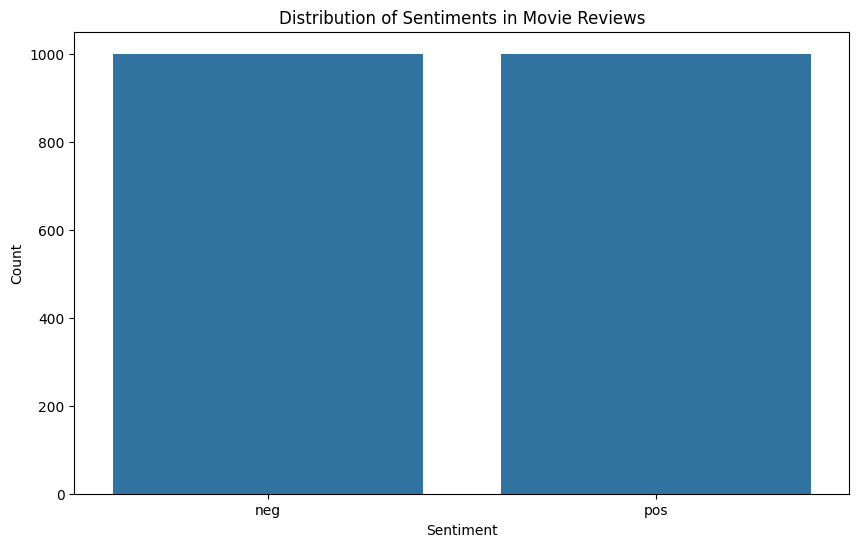

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category', data=df)
plt.title('Distribution of Sentiments in Movie Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   words            2000 non-null   object
 1   category         2000 non-null   object
 2   processed_words  2000 non-null   object
 3   processed_text   2000 non-null   object
 4   cluster          2000 non-null   int32 
dtypes: int32(1), object(4)
memory usage: 70.4+ KB
